**MUHAMMAD MUFTI ARDANI (221111001)**

***SVM (Support Vector Machine), KNN (K-Nearest Neighbor), Naive Bayes, Random Forest, Decision Tree, Neural Network***

In [ ]:
import pandas as pd

file_path = 'Hasil_Pelabelan_Data_3Class.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   stemming   522 non-null    object
 1   Score      522 non-null    int64 
 2   Sentiment  522 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.4+ KB


,stemming,Score,Sentiment
0,amerika ngebom ikn proyek tolol bom mangkrak n...,-2,Negatif
1,jokowi takut ikn dihambalangkan kali surabaya ...,-7,Negatif
2,kota pindah ikn alas jakarta tenggelam kembang...,0,Netral
3,kota pindah ikn oligarki jajah kuasa jakarta p...,-1,Negatif
4,gedung terminal genang air surut sisa lumpur g...,-8,Negatif


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

cleaned_data = data.dropna(subset=['stemming'])

X = cleaned_data['stemming']
y = cleaned_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('=========================')

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

Jumlah data latih: 417
Jumlah data uji: 105


((417, 1791), (105, 1791))

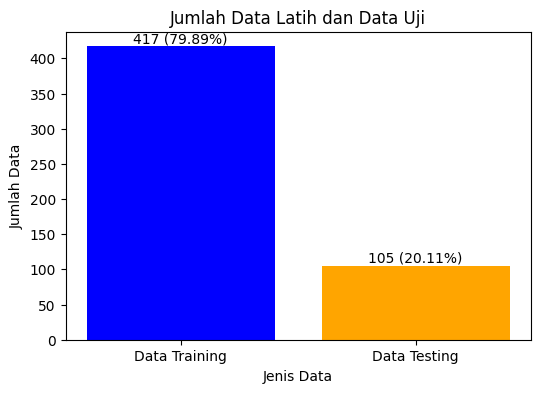

In [ ]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)', ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=500),
}

# Train models
results = {}
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


Confusion Matrix for SVM:


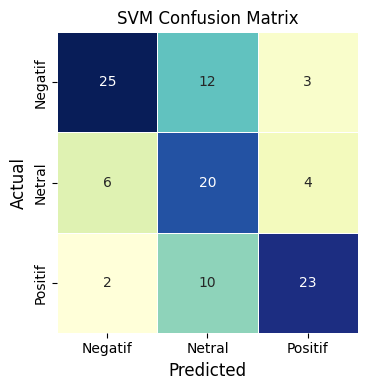


Confusion Matrix for KNN:


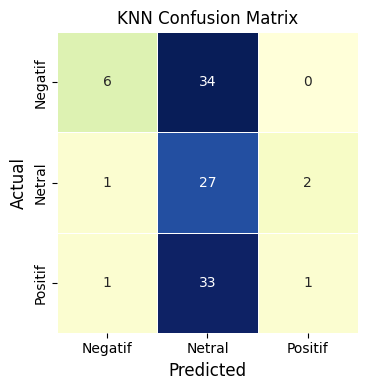


Confusion Matrix for Naive Bayes:


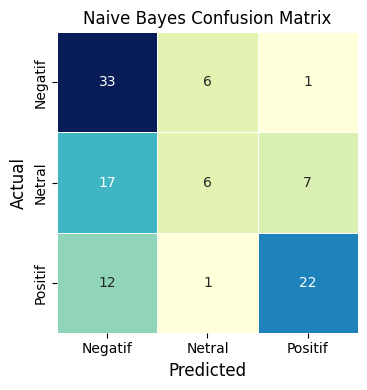


Confusion Matrix for Random Forest:


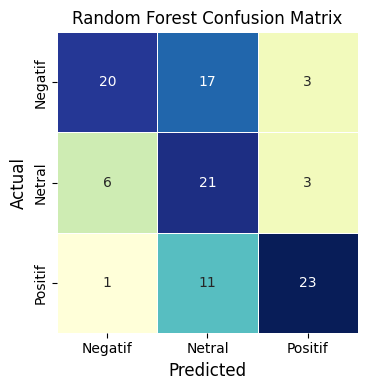


Confusion Matrix for Decision Trees:


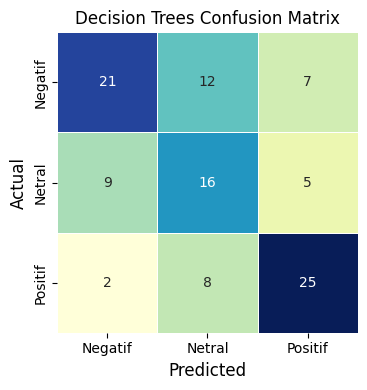


Confusion Matrix for Neural Network:


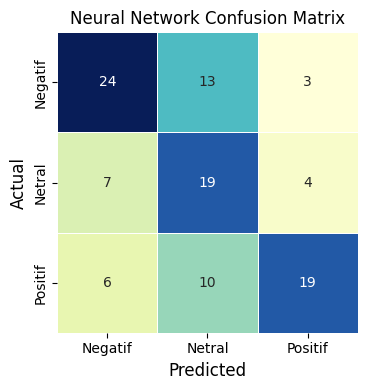

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        cbar=False,
        xticklabels=['Negatif', 'Netral', 'Positif'],
        yticklabels=['Negatif', 'Netral', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)

    plt.tight_layout()
    plt.show()

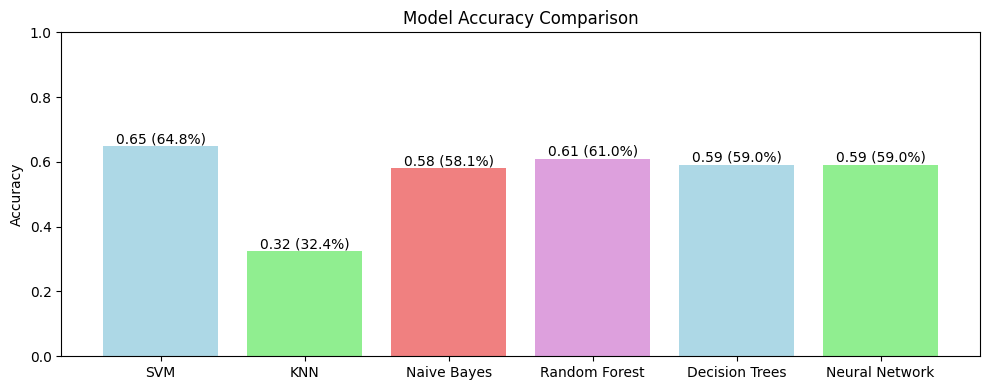

In [ ]:
import matplotlib.pyplot as plt

accuracies = {model: result['accuracy'] for model, result in results.items()}

plt.figure(figsize=(10, 4))
bars = plt.bar(list(accuracies.keys()), list(accuracies.values()), color=['lightblue', 'lightgreen', 'lightcoral', 'plum'])

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)
    display(styled_df)


Classification Report for SVM:


,precision,recall,f1-score,support
Negatif,0.758,0.625,0.685,40.000
Netral,0.476,0.667,0.556,30.000
Positif,0.767,0.657,0.708,35.000
accuracy,0.648,0.648,0.648,0.648
macro avg,0.667,0.650,0.649,105.000
weighted avg,0.680,0.648,0.656,105.000



Classification Report for KNN:


,precision,recall,f1-score,support
Negatif,0.750,0.150,0.250,40.000
Netral,0.287,0.900,0.435,30.000
Positif,0.333,0.029,0.053,35.000
accuracy,0.324,0.324,0.324,0.324
macro avg,0.457,0.360,0.246,105.000
weighted avg,0.479,0.324,0.237,105.000



Classification Report for Naive Bayes:


,precision,recall,f1-score,support
Negatif,0.532,0.825,0.647,40.000
Netral,0.462,0.200,0.279,30.000
Positif,0.733,0.629,0.677,35.000
accuracy,0.581,0.581,0.581,0.581
macro avg,0.576,0.551,0.534,105.000
weighted avg,0.579,0.581,0.552,105.000



Classification Report for Random Forest:


,precision,recall,f1-score,support
Negatif,0.741,0.500,0.597,40.000
Netral,0.429,0.700,0.532,30.000
Positif,0.793,0.657,0.719,35.000
accuracy,0.610,0.610,0.610,0.610
macro avg,0.654,0.619,0.616,105.000
weighted avg,0.669,0.610,0.619,105.000



Classification Report for Decision Trees:


,precision,recall,f1-score,support
Negatif,0.656,0.525,0.583,40.000
Netral,0.444,0.533,0.485,30.000
Positif,0.676,0.714,0.694,35.000
accuracy,0.590,0.590,0.590,0.590
macro avg,0.592,0.591,0.588,105.000
weighted avg,0.602,0.590,0.592,105.000



Classification Report for Neural Network:


,precision,recall,f1-score,support
Negatif,0.649,0.600,0.623,40.000
Netral,0.452,0.633,0.528,30.000
Positif,0.731,0.543,0.623,35.000
accuracy,0.590,0.590,0.590,0.590
macro avg,0.611,0.592,0.591,105.000
weighted avg,0.620,0.590,0.596,105.000
